In [50]:
import sympy
import math 
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import optimize

## Tsallis entropy 
#### The Tsallis entropy can be written in compact form 
$$
S_T = \gamma A^\delta
$$ 
#### where $A \propto L^2$ is the area of the system with characteristic lenght $L$. The parameters $\gamma$ and $\delta$ under the hypothesis of equal probabilities are related to the dimensionality of the system $d$, and specifically the important one is 
$$
\delta = \frac{d}{d-1}, \, \, \text{for} \,\, d > 1.
$$
#### In the case where $\delta = 1$ and $\gamma = 2 \pi M_p^2$, with $M_p$ the Planck mass, we obtain the usual additive entropy. 
### Tsallis holographic dark energy 
#### We consider a flat homogeneous and isotropic Friedmann-Robertson-Walker universe, in this case the horizon is 
$$
\int_{x}^{ \infty} \frac{dx}{Ha} = \frac{1}{a} \left( \frac{B}{3 M^2 H^2 \Omega_{DE}} \right)^{\frac{1}{4-2\delta}}. 
$$
#### In this model the evolution of the dark energy is given by the equation 
$$
{\Omega'}_{DE} = \Omega_{DE} \left( 1 - \Omega \right) \left( 2 \delta -1 +  Q\left(1 - \Omega_{DE} \right)^{\frac{1-\delta}{2(2-\delta)}} (\Omega_{DE})^{\frac{1}{2(2-\delta)} } e^{\frac{3(1-\delta)}{2(2-\delta)}x} \right)
$$
#### where 
$$
Q = 2 (2 - \delta) \left( \frac{B}{3 M_p^2 }\right)^{\frac{1}{2(\delta - 2 )}} \left( H_0 \sqrt{\Omega_{m0}} \right)^{\frac{1-\delta}{\delta-2}}
$$
#### 

In [95]:
#Right hand side of the equations
B = [0.1,0.01,0.02,0.05,0.08]
H0 = 70 
Om0 = 0.3
def tsallis_model0(Omega,x, d=0.9):
    Q = 2*(2-d)*( (B[0]/3)**(1./(2*(d-2))) )*( H0*np.sqrt(Om0) )**((1-d)/(d-2))
    dOmega = Omega*(1-Omega)*( 2*d - 1 + Q*((1-Omega)**((1-d)/(2*(2-d))))*(Omega*(1./(2*(2-d))))*np.exp((3*(1-d)/(2*(2-d)))*x ) )
    return dOmega

def tsallis_model1(Omega,x, d=0.9):
    Q = 2*(2-d)*( (B[1]/3)**(1./(2*(d-2))) )*( H0*np.sqrt(Om0) )**((1-d)/(d-2))
    dOmega = Omega*(1-Omega)*( 2*d - 1 + Q*((1-Omega)**((1-d)/(2*(2-d))))*(Omega*(1./(2*(2-d))))*np.exp((3*(1-d)/(2*(2-d)))*x ) )
    return dOmega


def tsallis_model2(Omega,x, d=0.9):
    Q = 2*(2-d)*( (B[2]/3)**(1./(2*(d-2))) )*( H0*np.sqrt(Om0) )**((1-d)/(d-2))
    dOmega = Omega*(1-Omega)*( 2*d - 1 + Q*((1-Omega)**((1-d)/(2*(2-d))))*(Omega*(1./(2*(2-d))))*np.exp((3*(1-d)/(2*(2-d)))*x ) )
    return dOmega

def tsallis_model3(Omega,x, d=0.9):
    Q = 2*(2-d)*( (B[3]/3)**(1./(2*(d-2))) )*( H0*np.sqrt(Om0) )**((1-d)/(d-2))
    dOmega = Omega*(1-Omega)*( 2*d - 1 + Q*((1-Omega)**((1-d)/(2*(2-d))))*(Omega*(1./(2*(2-d))))*np.exp((3*(1-d)/(2*(2-d)))*x ) )
    return dOmega

def tsallis_model4(Omega,x, d=0.9):
    Q = 2*(2-d)*( (B[4]/3)**(1./(2*(d-2))) )*( H0*np.sqrt(Om0) )**((1-d)/(d-2))
    dOmega = Omega*(1-Omega)*( 2*d - 1 + Q*((1-Omega)**((1-d)/(2*(2-d))))*(Omega*(1./(2*(2-d))))*np.exp((3*(1-d)/(2*(2-d)))*x ) )
    return dOmega


In [241]:
Om0 = 0.7 
x0 = np.log(1./(1+3))
xf = 0.0000001
loga = np.linspace(xf,x0,500)


sol_tsallis = [odeint(tsallis_model0,Om0,loga),odeint(tsallis_model1,Om0,loga),odeint(tsallis_model2,Om0,loga),odeint(tsallis_model3,Om0,loga),odeint(tsallis_model4,Om0,loga)]

plt.plot(loga,sol_tsallis[0],color='darkblue',label='B = 0.001')
plt.plot(loga,sol_tsallis[1],color='darkgreen',label='B = 0.01')
plt.plot(loga,sol_tsallis[2],color='darkred',label='B = 0.02')
plt.plot(loga,sol_tsallis[3],color='black',label='B = 0.05')
plt.plot(loga,sol_tsallis[4],color='violet',label='B = 0.08')
plt.legend()
plt.title('Tsallis Holographic Dark Energy ($\delta = 0.9$)')
plt.ylabel('$\Omega_{de}$')
plt.xlabel('$Log(a)$')
plt.grid()


TypeError: unsupported operand type(s) for -: 'int' and 'list'

## Holographic Dark Energy in modfied Barrow Cosmology 
#### Sheykhi, A., & Hamedan, M. S. (2023). Holographic Dark Energy in Modified Barrow Cosmology. Entropy, 25(4), 569. https://doi.org/10.3390/e25040569. 
#### Int his model que area law of the black hole entropy get modified 
$$
S = \left( \frac{A}{A_0} \right)^{1+\frac{\delta}{2}}
$$
#### where $A$ is the black hole horizon and $A_0$ is the Planck area. Thee exponent $\delta$ ranges as $0 \leq \delta \leq 1 $ and represents the amount of the quamtum-gravitational deformation effects. 
#### For the no non-interacting case the simensionless parameters are 
$$
\Omega_{de} = \frac{\rho_{de}}{3 M_{eff}^{2} H^{2 - \delta}}
$$
$$
\Omega_{m} = \frac{\rho_{m}}{3 M_{eff}^{2} H^{2 - \delta}}
$$
#### The evolution of the dark energy is given by the equation 
$$
{\Omega'}_{de} = \Omega_{de} \left( 1 - \Omega_{de} \right) \left( 1 + \delta + \left( 2 - \delta \right) \left(\frac{\Omega_{de}}{c^2} \right)^{\frac{1}{2\delta}} \right) 
$$

In [200]:
# Define global constants
d = [0.001, 0.1,0.5, 0.75,1.0,2]
c = 0.8

# define the models 
def barrow_model0(Omega, x):
    ex = (1/2*d[0]) 
    dOmega = Omega*(1-Omega)*(1 + d[0] + (2 - d[0])*((Omega/c**2)**(ex)))
    return dOmega  

def barrow_model1(Omega, x):
    ex = (1/2*d[1]) 
    dOmega = Omega*(1-Omega)*(1 + d[1] + (2 - d[1])*((Omega/c**2)**(ex)))
    return dOmega  

def barrow_model2(Omega, x):
    ex = (1/2*d[2]) 
    dOmega = Omega*(1-Omega)*(1 + d[2] + (2 - d[2])*((Omega/c**2)**(ex)))
    return dOmega  

def barrow_model3(Omega, x):
    ex = (1/2*d[3]) 
    dOmega = Omega*(1-Omega)*(1 + d[3] + (2 - d[3])*((Omega/c**2)**(ex)))
    return dOmega  

def barrow_model4(Omega, x):
    ex = (1/2*d[4]) 
    dOmega = Omega*(1-Omega)*(1 + d[4] + (2 - d[4])*((Omega/c**2)**(ex)))
    return dOmega  

def barrow_model5(Omega, x):
    ex = (1/2*d[5]) 
    dOmega = Omega*(1-Omega)*(1 + d[5] + (2 - d[5])*((Omega/c**2)**(ex)))
    return dOmega 


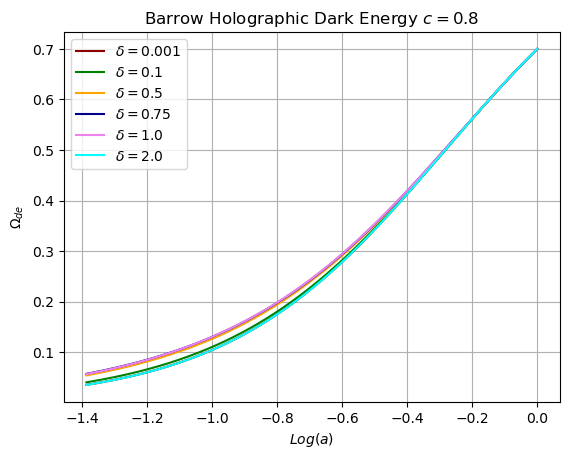

In [204]:
# solutions 
sol_barrow0= odeint(barrow_model0, Om0, loga)
sol_barrow1= odeint(barrow_model1, Om0, loga)
sol_barrow2= odeint(barrow_model2, Om0, loga)
sol_barrow3= odeint(barrow_model3, Om0, loga)
sol_barrow4= odeint(barrow_model4, Om0, loga)
sol_barrow5= odeint(barrow_model5, Om0, loga)

#plots 



plt.plot(loga,sol_barrow0,color='darkred',label='$\delta = 0.001$')
plt.plot(loga,sol_barrow1,color='green', label='$\delta = 0.1$')
plt.plot(loga,sol_barrow2,color='orange',label='$\delta = 0.5$')
plt.plot(loga,sol_barrow3,color='darkblue',label='$\delta = 0.75$')
plt.plot(loga,sol_barrow4,color= 'violet',label='$\delta = 1.0$')
plt.plot(loga,sol_barrow5,color='cyan',label='$\delta = 2.0$')
plt.title('Barrow Holographic Dark Energy $c = 0.8$')
plt.xlabel('$Log(a)$')
plt.ylabel('$\Omega_{de}$')
plt.grid()
plt.legend()

### Shooting method 

The initial value at z=3 is  0.1463661929152792


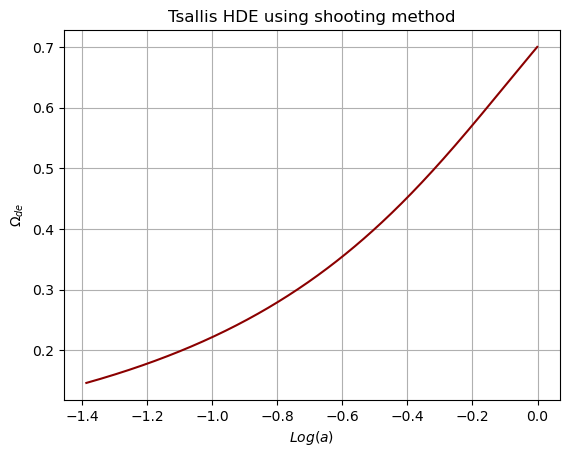

In [267]:
# Tsallis holographic dark energy case 
B   = [0.1,0.01,0.02,0.05,0.08]
H0 = 70 
Om0 = 0.3
# we use a model with specific values 
def tsallis_model000(Omega,x,d=0.9,b1 = B[0]):
    Q = 2*(2-d)*( (b1/3)**(1./(2*(d-2))))*( H0*np.sqrt(Om0) )**((1-d)/(d-2))
    dOmega = Omega*(1-Omega)*( 2*d - 1 + Q*((1-Omega)**((1-d)/(2*(2-d))))*(Omega*(1./(2*(2-d))))*np.exp((3*(1-d)/(2*(2-d)))*x))
    return dOmega

# define the interval on Log(a)
x_loga = np.linspace(np.log(1/(1+3)), np.log(0.999), 500)

# find the root of the function 

def tsallis_root(Omega_0 , Ode0=0.7):

    result_loga_tsallis = odeint(tsallis_model000, Omega_0*10**(-5),x_loga)
    return result_loga_tsallis[-1] - Ode0

# Using the Newton method to optimize 
s = optimize.newton(tsallis_root,np.log(0.9999))
# solving again the function with the initial value found 
sol_tsallis_shooting =odeint(tsallis_model000, s*10**(-5), x_loga)

# plot the solution 
plt.plot(x_loga, sol_tsallis_shooting,color='darkred',)
print('The initial value at z=3 is ', float(sol_tsallis_shooting[0]))
plt.xlabel('$Log(a)$')
plt.ylabel('$\Omega_{de}$')
plt.title('Tsallis HDE using shooting method')
plt.grid()


### Barrow Holographic Dark Energy

In [269]:
# Define global constants
d = [0.001, 0.1,0.5, 0.75,1.0,2]
c = 0.8

def barrow_model000(Omega, x):
    ex = (1/2*d[0]) 
    dOmega = Omega*(1-Omega)*(1 + d[0] + (2 - d[0])*((Omega/c**2)**(ex)))
    return dOmega 

# define the interval on Log(a)
x_loga = np.linspace(np.log(1/(1+3)), np.log(0.999), 500)

# find the root of the function 

def barrow_root(Omega_0 , Ode0=0.7):

    result_loga_barrow = odeint(barrow_model000, Omega_0*10**(-5),x_loga)
    return result_loga_barrow[-1] - Ode0

# Using the Newton method to optimize 
s = optimize.newton(barrow_root,np.log(0.9999))
# solving again the function with the initial value found 
#sol_barrow_shooting =odeint(barrow_model000, s*10**(-5), x_loga)

# plot the solution 
#plt.plot(x_loga, sol_barrow_shooting,color='darkred',)
#print('The initial value at z=3 is ', float(sol_barrow_shooting[0]))
#plt.xlabel('$Log(a)$')
#plt.ylabel('$\Omega_{de}$')
#plt.title('Tsallis HDE using shooting method')
#plt.grid()


 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 = -0.1383518221118D+01   r2 =                  NaN
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 = -0.1383518221118D+01   r2 =                  NaN


/tmp/ipykernel_53414/676590307.py:7: RuntimeWarning: invalid value encountered in power
  dOmega = Omega*(1-Omega)*(1 + d[0] + (2 - d[0])*((Omega/c**2)**(ex)))


RuntimeError: Tolerance of -0.00010001000050003335 reached. Failed to converge after 1 iterations, value is -0.00020001500083338068.